# 1. Import Required Libraries


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


# 2. Load Dataset

In [185]:
df= pd.read_csv("movies.csv")
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# 3. Dataset Overview 

In [186]:
df.shape

(10866, 21)

In [187]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [188]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# 4. Drop Irrelevant Columns

In [189]:
df.drop(columns = ["id", "imdb_id", "homepage","cast", "tagline", "overview","budget_adj" ], inplace=True)
df.head(5)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09


# 5. Handle Missing Values

In [190]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [191]:
df.dropna(how = 'any', subset=['genres','director'], inplace = True)

In [192]:
df['production_companies']=df['production_companies'].fillna(0)
df['keywords']=df['keywords'].fillna(0)

In [193]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
revenue_adj             0
dtype: int64

# 6. Round Popularity

In [194]:
df['popularity']= df['popularity'].round(2)

In [195]:
df

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.34,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00
10862,0.07,0,0,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00
10863,0.07,0,0,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


# 7. Feature Engineering: Profit and ROI

In [196]:
df.insert(3, 'profit', df.revenue-df.budget)

In [197]:
df.insert(4, 'roi', df.profit/df.budget)

In [198]:
df1= [['popularity', 'budget', 'revenue','profit','roi','vote_count', 'vote_average', 'release_year']]

In [199]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
profit                     0
roi                     4641
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [200]:
non_finite_values=~np.isfinite(df['roi'])

In [201]:
non_finite_values.sum()

5636

# 8. Handle Infinite ROI Values

In [202]:
df['roi']= df['roi'].replace([np.inf, -np.inf], np.nan)

# 9. Histograms of Numerical Columns

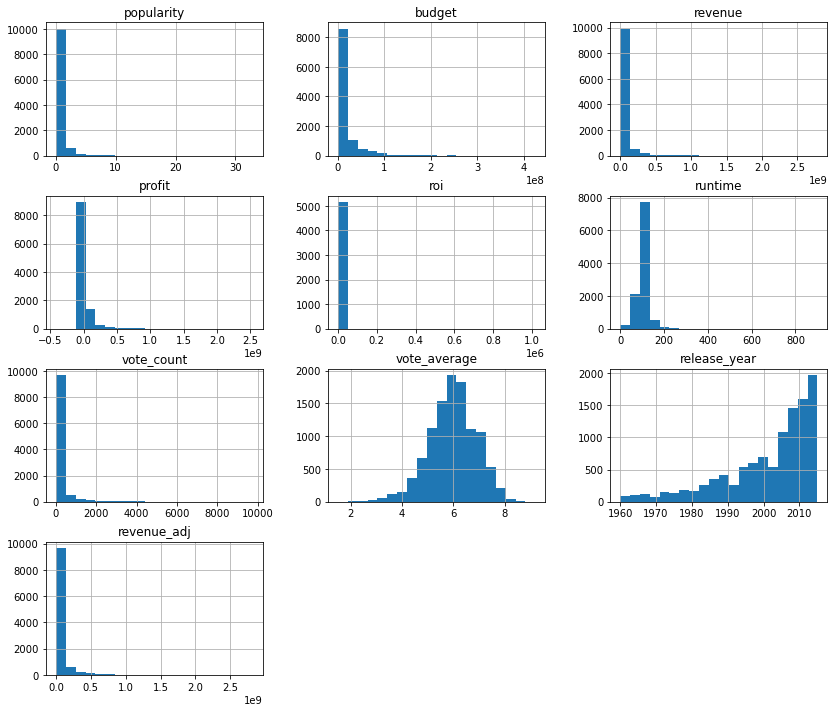

In [203]:
df.hist(bins=20, figsize=(14,12))
plt.show()

In [204]:
df.popularity.value_counts()


0.14    193
0.28    190
0.21    186
0.25    182
0.20    179
       ... 
5.81      1
5.08      1
3.83      1
3.74      1
2.68      1
Name: popularity, Length: 483, dtype: int64

In [205]:
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.17,200000000,2068178225,1868178225,9.340891,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.34,190000000,1506249360,1316249360,6.927628,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,0,NaN,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00
10862,0.07,0,0,0,NaN,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


# 10.  ROI Trend Over Years

<AxesSubplot:xlabel='release_year'>

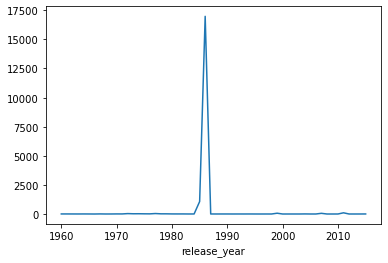

In [206]:
df2=df.groupby('release_year')['roi'].mean()
df2.plot(kind='line')

# 11. Popularity Trend Over Years 

Text(0, 0.5, 'Popularity')

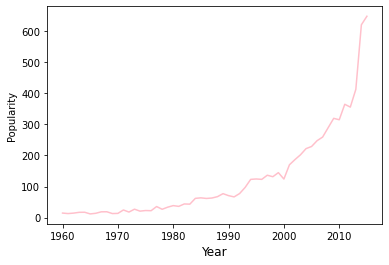

In [207]:
df3=df.groupby('release_year')['popularity'].sum()
df3.plot(kind='line', color='pink')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Popularity')

Text(0, 0.5, 'Popularity')

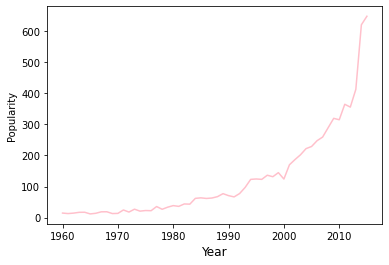

In [208]:
df4=df.groupby('release_year')['popularity'].sum()
df3.plot(kind='line', color='pink')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Popularity')

# 12. Rating Trend Over Years

Text(0, 0.5, 'Ratings')

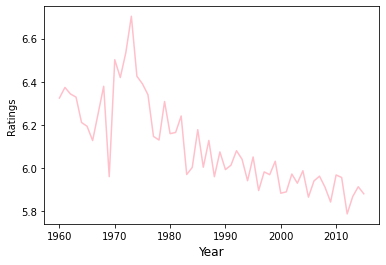

In [209]:
df4=df.groupby('release_year')['vote_average'].mean()
df4.plot(kind='line', color='pink')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ratings')

# 13. Popularity vs Rating Scatter Plot 

Text(0.5, 0, 'Popularity')

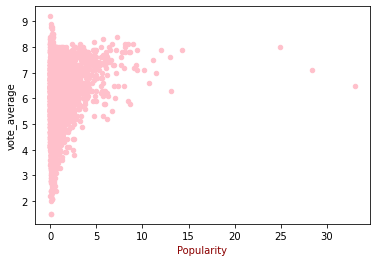

In [210]:
df5= df.plot.scatter(x='popularity', y='vote_average', c = 'pink',figsize=(6,4))
df5.set_xlabel('Popularity', color = "DarkRed")
df5.set_xlabel("Vote Average", color = "DarkRed")
df5.set_xlabel('Popularity', color = "DarkRed")


In [211]:
df.head(5)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.17,200000000,2068178225,1868178225,9.340891,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.34,190000000,1506249360,1316249360,6.927628,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09


# 14. Genre Analysis

In [212]:
df.genres.value_counts()

Drama                                      711
Comedy                                     707
Documentary                                306
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Science Fiction|Horror|Action|Thriller       1
Action|Thriller|Science Fiction|Mystery      1
Comedy|Music|Romance|Foreign                 1
Documentary|Drama|Comedy                     1
Mystery|Science Fiction|Thriller|Drama       1
Name: genres, Length: 2031, dtype: int64

In [213]:
split = ['genres']
for i in split:
    df[i]= df[i].apply(lambda x: x.split("|") )
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


In [214]:
df= df.explode('genres')
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


In [215]:
# Sum of popularity by genre
df7= df.groupby('genres')["popularity"].sum().sort_values(ascending= True)
df7

genres
Foreign              35.24
TV Movie             44.03
Documentary          93.13
Western              97.42
History             192.35
War                 196.48
Music               198.15
Mystery             558.55
Animation           594.46
Horror              761.39
Fantasy             908.87
Family              967.06
Crime              1009.07
Romance            1013.21
Science Fiction    1230.41
Adventure          1697.11
Thriller           2155.90
Action             2208.08
Comedy             2246.25
Drama              2815.43
Name: popularity, dtype: float64

<AxesSubplot:ylabel='genres'>

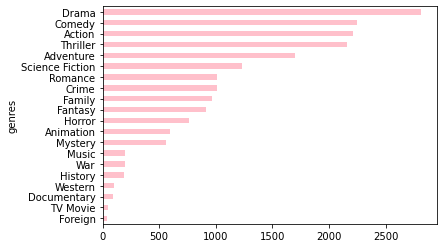

In [216]:
df7.plot.barh(x= 'genres', y= 'popularity', color= 'pink')

In [217]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08


In [218]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
profit                    int64
roi                     float64
original_title           object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
revenue_adj             float64
dtype: object

# 15. Monthly Popularity Analysis

In [219]:
df['release_date']= pd.to_datetime(df['release_date'])

In [220]:
df['extracted_month']= df['release_date'].dt.month

In [221]:
df8 = df.groupby('extracted_month')['popularity'].sum()

In [222]:
df8

extracted_month
1     1131.78
2     1092.93
3     1458.32
4     1191.81
5     1687.53
6     1936.84
7     1694.03
8     1432.59
9     1872.28
10    1811.91
11    1710.35
12    2002.22
Name: popularity, dtype: float64

In [223]:
df8.index


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='extracted_month')

In [224]:
df8.values

array([1131.78, 1092.93, 1458.32, 1191.81, 1687.53, 1936.84, 1694.03,
       1432.59, 1872.28, 1811.91, 1710.35, 2002.22])

In [225]:
# Convert to DataFrame
data = {
    'extracted_month': df8.index,
    'popularity': df8.values
}
df8=pd.DataFrame(data)

In [226]:
df8

,extracted_month,popularity
0,1,1131.78
1,2,1092.93
2,3,1458.32
3,4,1191.81
4,5,1687.53
5,6,1936.84
6,7,1694.03
7,8,1432.59
8,9,1872.28
9,10,1811.91


In [227]:
# Map month numbers to names
index_to_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}


In [228]:
df8.extracted_month= df8.extracted_month.map(index_to_month)

In [229]:
df8

,extracted_month,popularity
0,Jan,1131.78
1,Feb,1092.93
2,Mar,1458.32
3,Apr,1191.81
4,May,1687.53
5,Jun,1936.84
6,Jul,1694.03
7,Aug,1432.59
8,Sep,1872.28
9,Oct,1811.91


<AxesSubplot:xlabel='extracted_month'>

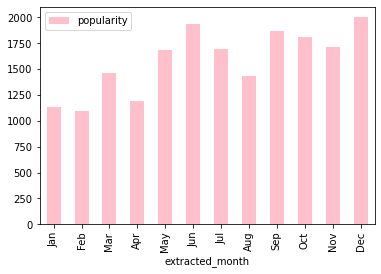

In [230]:
# Plot Monthly Popularity
df8.plot(kind= 'bar', x= "extracted_month", y="popularity", color = 'pink')

# 16. Monthly Revenue Analysis

In [231]:
df9= df.groupby('extracted_month')['revenue'].sum()
df9

extracted_month
1      35873456579
2      54352852344
3      93669046441
4      77813179749
5     151475532493
6     193681776686
7     141947570995
8      71642408883
9      70379641581
10     84054172048
11    139176268899
12    164738399960
Name: revenue, dtype: int64

In [232]:
data = {
    'extracted_month': df9.index,
    'revenue': df9.values
}
df9=pd.DataFrame(data)

In [233]:
index_to_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}


In [234]:
df9.extracted_month= df9.extracted_month.map(index_to_month)

In [235]:
df9

,extracted_month,revenue
0,Jan,35873456579
1,Feb,54352852344
2,Mar,93669046441
3,Apr,77813179749
4,May,151475532493
5,Jun,193681776686
6,Jul,141947570995
7,Aug,71642408883
8,Sep,70379641581
9,Oct,84054172048


<AxesSubplot:xlabel='extracted_month'>

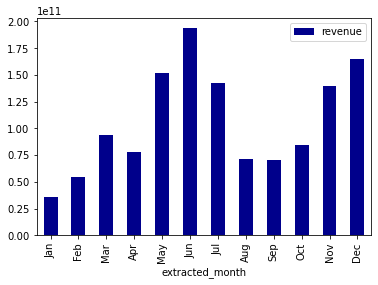

In [236]:
df9.plot(kind = 'bar', x= 'extracted_month' , y= 'revenue', color='Darkblue' )

In [237]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,extracted_month
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5


# 17. Top 5 Profitable Movies

In [238]:
df10=df.groupby('original_title')['profit'].sum().sort_values(ascending= False).head(5)
df10

original_title
Avatar                          10178023388
Star Wars: The Force Awakens     7472712900
Jurassic World                   5454115240
The Net                          5421398290
Titanic                          4896102564
Name: profit, dtype: int64

Text(0.5, 1.0, 'Top 5 Movies by profit')

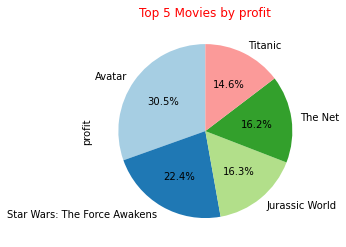

In [239]:
df10.plot(kind='pie', autopct= '%1.1f%%', startangle= 90, colors= plt.cm.Paired.colors)
plt.title('Top 5 Movies by profit', color='red')

# So the winner is Avatar movie